**Connect google drive**

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Mon Dec  6 18:18:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Digitalna kleksografija.mkv'  'PMMV Predavanja summary.m4a'   yolov2
 IMG_8617.MOV		       'PMMV Predavanja Summary.mkv'   yolov3
 IMG_8643.MOV		       'PMMV Priprave na izpit.mkv'    yolov4
 IMG_8644.MOV		       'PMMV Vaje summary.m4a'
'My Drive'		        yolov1


**1) Clone the Darknet**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15376, done.
remote: Total 15376 (delta 0), reused 0 (delta 0), pack-reused 15376
Receiving objects: 100% (15376/15376), 14.01 MiB | 13.13 MiB/s, done.
Resolving deltas: 100% (10340/10340), done.


**2) Compile Darknet using Nvidia GPU**


In [ ]:
%cd darknet

/content/darknet


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

**3) Configure Darknet network for training YOLO V3**

In [ ]:
!cp cfg/yolov3-tiny_occlusion_track.cfg cfg/yolov3-tiny_occlusion_track_training.cfg

In [ ]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3-tiny_occlusion_track_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3-tiny_occlusion_track_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3-tiny_occlusion_track_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3-tiny_occlusion_track_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3-tiny_occlusion_track_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3-tiny_occlusion_track_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3-tiny_occlusion_track_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3-tiny_occlusion_track_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3-tiny_occlusion_track_training.cfg

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/mydrive/yolov3"

mkdir: cannot create directory ‘/mydrive/yolov3’: File exists


In [ ]:
!echo "Koala" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data
!mkdir data/obj

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-12-05 15:35:20--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  23.1MB/s    in 7.6s    

2021-12-05 15:35:28 (20.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [ ]:
!unzip /mydrive/yolov3/images2.zip -d data/obj

Archive:  /mydrive/yolov3/images2.zip
   creating: data/obj/test/
  inflating: data/obj/test/0001.png  
  inflating: data/obj/test/0002.png  
  inflating: data/obj/test/0003.png  
  inflating: data/obj/test/0004.png  
  inflating: data/obj/test/0005.png  
  inflating: data/obj/test/0006.png  
  inflating: data/obj/test/0007.png  
  inflating: data/obj/test/0008.png  
  inflating: data/obj/test/0009.png  
  inflating: data/obj/test/0010.png  
  inflating: data/obj/test/0011.png  
  inflating: data/obj/test/0012.png  
  inflating: data/obj/test/0013.png  
  inflating: data/obj/test/0014.png  
  inflating: data/obj/test/0015.png  
  inflating: data/obj/test/0016.png  
  inflating: data/obj/test/0017.png  
  inflating: data/obj/test/0018.png  
  inflating: data/obj/test/0019.png  
  inflating: data/obj/test/0020.png  
  inflating: data/obj/test/0021.png  
  inflating: data/obj/test/0022.png  
  inflating: data/obj/test/0023.png  
  inflating: data/obj/test/0024.png  
  inflating: data/obj/

In [ ]:
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return [x,y,w,h]

In [ ]:
w = 199
h = 100
xmin = 12
xmax = 122
ymin = 12
ymax = 80

print(xmin, xmax, ymin, ymax) #define your x,y coordinates
b = (xmin, xmax, ymin, ymax)
bb = convert((w,h), b)
print(bb)

# ['0', '120', '142', '19', '83']
# 741 data/obj/images/0485.txt
# 0 12.644791666666666 20.03472222222222 24.789583333333333 39.28055555555556

# w = 480
# h = 360
# xmin = 120
# xmax = 120 + 19
# ymin = 12
# ymax = 80

# print(xmin, xmax, ymin, ymax) #define your x,y coordinates
# b = (xmin, xmax, ymin, ymax)
# bb = convert((w,h), b)
# print(bb)

12 122 12 80
[0.33668341708542715, 0.46, 0.5527638190954774, 0.68]


In [ ]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

img_w = 480
img_h = 360
# c x   y   w  h
# 0 371 101 24 39 

txt_file_paths = glob.glob(r"data/obj/images/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                b = (int(numbers[1]), int(numbers[1]) + int(numbers[3]), int(numbers[2]), int(numbers[2]) + int(numbers[4]))
                bb = convert((img_w,img_h), b)
                # Define coordinates
                text = "{} {} {} {} {}".format(0, bb[0], bb[1], bb[2], bb[3])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

0 30 146 115 129 

['0', '30', '146', '115', '129']
0 data/obj/images/0071.txt
0 0.18229166666666666 0.5847222222222223 0.23958333333333334 0.35833333333333334
0 272 91 30 55 

['0', '272', '91', '30', '55']
1 data/obj/images/0350.txt
0 0.5979166666666667 0.32916666666666666 0.0625 0.1527777777777778
0 122 120 36 58 

['0', '122', '120', '36', '58']
2 data/obj/images/0686.txt
0 0.2916666666666667 0.4138888888888889 0.075 0.16111111111111112
0 309 160 36 50 

['0', '309', '160', '36', '50']
3 data/obj/images/0082.txt
0 0.68125 0.513888888888889 0.075 0.1388888888888889
0 307 84 64 57 

['0', '307', '84', '64', '57']
4 data/obj/images/0747.txt
0 0.70625 0.3125 0.13333333333333333 0.15833333333333333
0 368 149 47 90 

['0', '368', '149', '47', '90']
5 data/obj/images/0576.txt
0 0.8156249999999999 0.5388888888888889 0.09791666666666667 0.25
0 262 143 25 58 

['0', '262', '143', '25', '58']
6 data/obj/images/0274.txt
0 0.571875 0.4777777777777778 0.052083333333333336 0.16111111111111112
0 1

In [ ]:
import glob
images_list = glob.glob("data/obj/images/*.png")
print(images_list)

['data/obj/images/0026.png', 'data/obj/images/0182.png', 'data/obj/images/0089.png', 'data/obj/images/0155.png', 'data/obj/images/0054.png', 'data/obj/images/0226.png', 'data/obj/images/0127.png', 'data/obj/images/0091.png', 'data/obj/images/0177.png', 'data/obj/images/0235.png', 'data/obj/images/0197.png', 'data/obj/images/0129.png', 'data/obj/images/0206.png', 'data/obj/images/0223.png', 'data/obj/images/0178.png', 'data/obj/images/0001.png', 'data/obj/images/0083.png', 'data/obj/images/0168.png', 'data/obj/images/0146.png', 'data/obj/images/0236.png', 'data/obj/images/0245.png', 'data/obj/images/0201.png', 'data/obj/images/0053.png', 'data/obj/images/0184.png', 'data/obj/images/0212.png', 'data/obj/images/0204.png', 'data/obj/images/0172.png', 'data/obj/images/0105.png', 'data/obj/images/0208.png', 'data/obj/images/0090.png', 'data/obj/images/0043.png', 'data/obj/images/0130.png', 'data/obj/images/0034.png', 'data/obj/images/0161.png', 'data/obj/images/0148.png', 'data/obj/images/01

In [ ]:
import cv2
import numpy as np

image = cv2.imread('0001.png')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
value = 42 #whatever value you want to add
hsv[:,:,2] += value

# cv2.add(hsv[:,:,2], value, hsv[:,:,2])
image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('out.png', image)

True

In [ ]:
# brightness correction

def convertScale(img, alpha, beta):
    """Add bias and gain to an image with saturation arithmetics. Unlike
    cv2.convertScaleAbs, it does not take an absolute value, which would lead to
    nonsensical results (e.g., a pixel at 44 with alpha = 3 and beta = -210
    becomes 78 with OpenCV, when in fact it should become 0).
    """

    new_img = img * alpha + beta
    new_img[new_img < 0] = 0
    new_img[new_img > 255] = 255
    return new_img.astype(np.uint8)

# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=25):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    '''
    # Calculate new histogram with desired range and show histogram 
    new_hist = cv2.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
    plt.plot(hist)
    plt.plot(new_hist)
    plt.xlim([0,256])
    plt.show()
    '''

    auto_result = convertScale(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)

In [ ]:
# Preprocessing
import numpy as np
import cv2
# random.shuffle(images_list)
data_size=len(images_list)

channels = 3
IMG_SIZE_W=480
IMG_SIZE_H=360

dataset = np.ndarray(shape=(data_size, IMG_SIZE_H, IMG_SIZE_W,channels),
                     dtype=np.float32)

i = 0
for _file in images_list:
  image = cv2.imread(_file)
  image=cv2.resize(image, (IMG_SIZE_W, IMG_SIZE_H))
    
  dataset[i] = image
  i += 1


for i, im in enumerate(dataset):
  imgg = im.astype('uint8')

  # Brightness correction
  image_bright, alpha, beta = automatic_brightness_and_contrast(imgg)


  # edge enhancment
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=image_bright, ddepth=-1, kernel=kernel)

  # Histogram equalization
  intensity_img = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2YCrCb)
  intensity_img[:, :, 0] = cv2.equalizeHist(intensity_img[:, :, 0])


  dataset[i] = cv2.cvtColor(intensity_img, cv2.COLOR_YCrCb2BGR)


# mean-centred image
mean = dataset.mean(axis=(0,1,2))

dataset[..., 0] -= mean[0]
dataset[..., 1] -= mean[1]
dataset[..., 2] -= mean[2]

for i, im in enumerate(dataset):
  im_name = images_list[i]
  cv2.imwrite(im_name, im)

# cv2_imshow(dataset[0])
# cv2_imshow(img_hist)

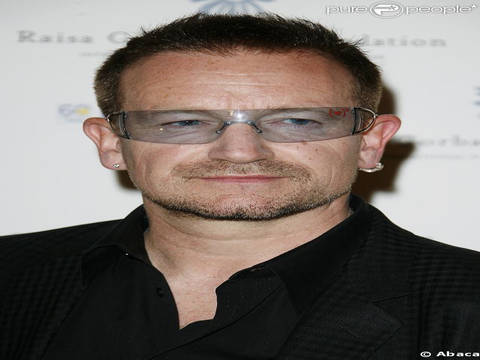

True

In [ ]:
im = cv2.imread('../0017.png')
cv2_imshow(im)
cv2.imwrite("../0017.png", im)

In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

**6) Start the training**

In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.449073), count: 1, class_loss = 0.232622, iou_loss = 0.300136, total_loss = 0.532758 
 total_bbox = 81508, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000163, iou_loss = 0.000000, total_loss = 0.000163 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.796227), count: 3, class_loss = 0.007115, iou_loss = 0.312189, total_loss = 0.319304 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.707816), count: 1, class_loss = 0.006512, iou_loss = 0.043578, total_loss = 0.050090 
 total_bbox = 81512, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000269, iou_loss = 0.000000, total_loss = 0.000269 
v3 (mse